In [151]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from matplotlib import pylab

In [152]:
# Fetch and prepare data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(url, names = headers)

In [153]:
# Preview data frame

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [154]:
# Identify and handle missing values #################################

In [155]:
# fix ? symbols / Missing values

df.replace('?', np.NaN, inplace = True)

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [156]:
# Check for missing Data

# BY FIXNG MISSING THAT WE INTRODUCE BIAS... Bare in mind

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")    
    
del missing_data

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [157]:
# Deal with missing data #############################################

In [158]:
# Calculate the mean value for the "normalized-losses" column

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)

print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [159]:
# Replace "NaN" with mean value in "normalized-losses" column

df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [160]:
# Free resources

del avg_norm_loss

In [161]:
# Calculate the mean value for the "bore" column

avg_bore = df['bore'].astype('float').mean(axis=0)

print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [162]:
# Replace "NaN" with the mean value in the "bore" column

df["bore"].replace(np.nan, avg_bore, inplace=True)

In [163]:
# Free resources

del avg_bore

In [164]:
# Calculate the mean value for the "stroke" column

avg_stroke = df['stroke'].astype('float').mean(axis=0)

print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


In [165]:
# Replace "NaN" with mean value in "stroke" column

df["stroke"].replace(np.nan, avg_stroke, inplace=True)

In [166]:
# Free resources

del avg_stroke

In [167]:
# Calculate the mean value for the "horsepower" column

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)

print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [168]:
# Replace "NaN" with the mean value in the "horsepower" column

df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [169]:
# Free resources

del avg_horsepower

In [170]:
# Calculate the mean value for "peak-rpm" column

avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)

print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [171]:
# Replace "NaN" with the mean value in the "peak-rpm" column

df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [172]:
# Free resources

del avg_peakrpm

In [173]:
# See what number of doors prevails the most

df['num-of-doors'].value_counts()

most_frequent_door_number =df['num-of-doors'].value_counts().idxmax()

In [174]:
# Replace the missing 'num-of-doors' values by the most frequent 

df["num-of-doors"].replace(np.nan, most_frequent_door_number, inplace=True)

In [175]:
# Free resources

del most_frequent_door_number

In [176]:
# Drop missing values along the column "price"

df.dropna(subset=["price"], axis=0, inplace=True)

In [177]:
# reset index, because we droped two rows

df.reset_index(drop=True, inplace=True)

In [178]:
# Check for missing data once again

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")    
    
del missing_data

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

In [179]:
# Correct data format ################################################

In [180]:
# Check infered data types

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [181]:
# Convert data types to proper format

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [182]:
# Check new data types

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [183]:
# Data Standardization ###############################################

In [184]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
# L/100km = 235 / mpg

df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 

df.head()

#df['city-L/100km'].std()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [185]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
# L/100km = 235 / mpg

df['highway-L/100km'] = 235/df["highway-mpg"]

# check your transformed data 

df.head()

#df['highway-L/100km'].std()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [186]:
# Data Normalization #################################################

In [187]:
# replace (original value) by (original value)/(maximum value)

df['length'] = df['length']/df['length'].max()

df['width'] = df['width']/df['width'].max()

df['height'] = df['height']/df['height'].max()

In [188]:
# Binning ############################################################

Text(0.5, 1.0, 'horsepower bins')

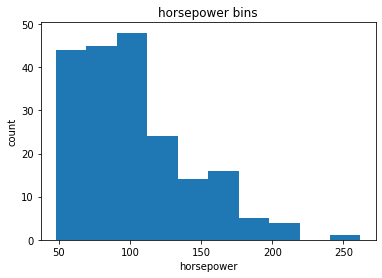

In [189]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [190]:
group_names = ['Low', 'Medium', 'High']

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'horsepower bins')

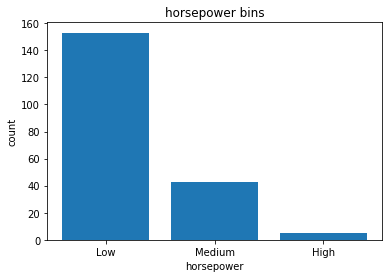

In [191]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [192]:
# Indicator Variables ################################################

In [193]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])

dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [194]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

In [195]:
######################################################################

In [196]:
# get a statistical summary of each column

df.describe(include="all")

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201,201,201,201,201,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,115,94,118,198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,153,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,...,25.179104,30.686567,13207.129353,9.944145,8.044957,NaN,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,...,6.423220,6.815150,7947.066342,2.534599,1.840739,NaN,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,...,13.000000,16.000000,5118.000000,4.795918,4.351852,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,...,19.000000,25.000000,7775.000000,7.833333,6.911765,NaN,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,...,24.000000,30.000000,10295.000000,9.791667,7.833333,NaN,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,...,30.000000,34.000000,16500.000000,12.368421,9.400000,NaN,0.000000,1.000000,1.000000,0.000000


In [197]:
# Store output

df.to_csv("./clean_df.csv")